In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from datetime import datetime
import os
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import random

### Plots based on machine learning model for classification

In [2]:
training_data_part = '../dmoz_links.json'
categories = ['health', 'education', 'Agriculture', 'technology', 'transport',
       'climate_environment', 'finance']

In [3]:
json_content =[]
with open(training_data_part,'r') as fl:
    json_content = json.load(fl)

In [4]:
list(json_content.keys())
pd.DataFrame(json_content['finance'])

,link,title,description
0,http://20somethingfinance.com/,20 Something Finance,Articles focused on helping young people manag...
1,http://www.aarp.org/money/,AARP - Money and Work,Discussion of money matters in considerable de...
2,http://financialplan.about.com/,About.com: Financial Planning,"Information on personal financial planning, in..."
3,http://www.asec.org/,American Savings Education Council,A coalition of government and industry institu...
4,http://www.bankrate.com/,Bankrate.com,An online publication that provides consumers ...
...,...,...,...
581,http://revenue.wyo.gov/,Wyoming,Wyoming Department of Revenue provides state i...
582,http://www.boe.ca.gov/sutax/staxformsn.htm,Board of Equalization,Sales and use tax forms and publications.
583,http://www.edd.ca.gov/Payroll_Taxes/Forms_and_...,Employment Development Department,"Employment tax forms, publications, posters, a..."
584,http://www.ftb.ca.gov/forms/search/index.aspx,Franchise Tax Board,Provides state personal and business income ta...


In [5]:
model_data =[{'category':x,'count':len(json_content[x])} for x in json_content]

plotFrame = pd.DataFrame(model_data)
plotFrame

,category,count
0,finance,586
1,education,18345
2,health,43757
3,Agriculture,6788
4,transport,8519
5,climate/environment,4992
6,technology,7748


<Axes: title={'center': 'Number of downloaded date per category for classifier training'}, xlabel='category', ylabel='Downloaded document'>

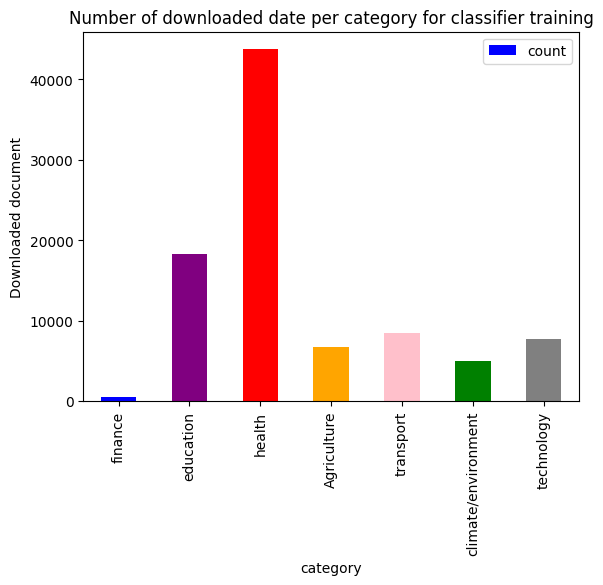

In [6]:
plotFrame.plot.bar(x='category',y='count',ylabel='Downloaded document', color=['blue','purple','red','orange','pink','green','gray'], title="Number of downloaded date per category for classifier training")

load the data for the graph

In [7]:
def loadAllFiles(method='block'):
    seed_count = 3
    result = []
    for i in range(seed_count):
        file_path = "../log/metric_log/metrics_log_"+method+"_"+str(i+1)+'.csv'
        temp = pd.read_csv(file_path)
        result.append(temp)
    # result.append(combineSeedURLs(result))
    return result

In [8]:
block_files = loadAllFiles()
bfs_files = loadAllFiles('bfs')

# just call the equivalent load function for the other methods here
block_files[0]

,crawled_count,saved_count,category,virtual_web_count,target_len,timestamp
0,10,0,health,105,1.000000,1700246615121432118
1,10,0,education,105,1.000000,1700246615121432118
2,10,2,Agriculture,105,1.000000,1700246615121432118
3,10,0,technology,105,1.000000,1700246615121432118
4,10,0,transport,105,1.000000,1700246615121432118
...,...,...,...,...,...,...
1353,1940,43,Agriculture,273,2.090155,1703955088057320011
1354,1940,17,technology,273,2.090155,1703955088057320011
1355,1940,16,transport,273,2.090155,1703955088057320011
1356,1940,156,climate_environment,273,2.090155,1703955088057320011


In [9]:
def add_harvest_rate(data):
    data['harvest_rate'] = data.loc[:,'saved_count'] / data.loc[:,'crawled_count']
    return data

def add_target_recall(data):
    data['target_recall'] = data.loc[:,'saved_count'] / data.loc[:,'virtual_web_count']
    return data


In [10]:

for i in range(len(block_files)):
    block_files[i]=add_harvest_rate(block_files[i])
    block_files[i]=add_target_recall(block_files[i])

for i in range(len(bfs_files)):
    bfs_files[i]=add_harvest_rate(bfs_files[i])
    bfs_files[i]=add_target_recall(bfs_files[i])

bfs_files[-1]

,crawled_count,saved_count,category,virtual_web_count,target_len,timestamp,harvest_rate,target_recall
0,10,0,health,21,0.000000,1700764587870879595,0.000000,0.000000
1,10,0,education,21,0.000000,1700764587870879595,0.000000,0.000000
2,10,0,Agriculture,21,0.000000,1700764587870879595,0.000000,0.000000
3,10,0,technology,21,0.000000,1700764587870879595,0.000000,0.000000
4,10,0,transport,21,0.000000,1700764587870879595,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1920,2750,7,Agriculture,189,13.380152,1703555830956609096,0.002545,0.037037
1921,2750,13,technology,189,13.380152,1703555830956609096,0.004727,0.068783
1922,2750,2,transport,189,13.380152,1703555830956609096,0.000727,0.010582
1923,2750,74,climate_environment,189,13.380152,1703555830956609096,0.026909,0.391534


graphs for harvest rate

In [11]:

# all_data_block=[ {} for x in range(4)]  
# all_data_bfs =[{} for x in range(4)]
# # data_plot_seed1 = pd.DataFrame({
# #         'Page Count': block_files[0],
# #         'BFS':harvest_rate_bfs,
# #         'BLOCK':harvest_rate_block,
# #         'Another':harvest_rate_another
# #     })

# # all_data_block

# important_columns = ['harvest_rate','target_recall','category','target_len']
# important_columns_gen = ['harvest_rate','target_recall','target_len']
# for  cat in categories:
#     all_data_block[0][cat] = block_files[0].loc[block_files[0]['category'] == cat,important_columns]
#     all_data_block[1][cat] = block_files[1].loc[block_files[1]['category'] == cat, important_columns]
#     all_data_block[2][cat] = block_files[2].loc[block_files[2]['category'] == cat,important_columns]
    
#     all_data_bfs[0][cat] = bfs_files[0].loc[bfs_files[0]['category'] == cat,important_columns]
#     all_data_bfs[1][cat] = bfs_files[1].loc[bfs_files[1]['category'] == cat,important_columns]
#     all_data_bfs[2][cat] = bfs_files[2].loc[bfs_files[2]['category'] == cat,important_columns]

# all_data_block[3]['all'] = block_files[3].loc[:,important_columns_gen]
# all_data_bfs[3]['all'] = bfs_files[3].loc[:,important_columns_gen]

# all_data_bfs[-1]

### Now lets start plotting the graphs

define methods for plotting the dictionary as subplots based on the numbers of plots to be shown

In [12]:

def plotSeedURL(seedValue,categories,alg, metrics):
    data = {}
    for mt in metrics:
        data[mt]= {}
        for i in range(len(seedValue)):
            seed = seedValue[i]
            label = alg[i]
            data[mt][label] = seed.loc[:,mt]
        data[mt]['category'] = seed.loc[:,'category']
        data[mt]['crawled_count'] = seed.loc[:'crawled_count']
    return data
    for mt in data:
        data[mt]= pd.DataFrame(data[mt])
    
    # now plot each metrics
    for mt in data:
        plotMetrics(mt,categories,data[mt])


In [13]:
tmm=[]
def plotAlgorithms(category, plotConfig,metrics, seedCount=4):
    # plot config contains values to plot for each algorithm
    alg = list(plotConfig.keys())
    seed_alg_values = []

    for i in range(seedCount):
        temp = []
        for lab in  plotConfig:
            temp.append(plotConfig[lab][i])
        seed_alg_values.append(temp)
    
    for data in seed_alg_values:
        tmm = plotSeedURL(data, category, alg, metrics)
    return tmm


In [14]:
block_files[0]

,crawled_count,saved_count,category,virtual_web_count,target_len,timestamp,harvest_rate,target_recall
0,10,0,health,105,1.000000,1700246615121432118,0.000000,0.000000
1,10,0,education,105,1.000000,1700246615121432118,0.000000,0.000000
2,10,2,Agriculture,105,1.000000,1700246615121432118,0.200000,0.019048
3,10,0,technology,105,1.000000,1700246615121432118,0.000000,0.000000
4,10,0,transport,105,1.000000,1700246615121432118,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1353,1940,43,Agriculture,273,2.090155,1703955088057320011,0.022165,0.157509
1354,1940,17,technology,273,2.090155,1703955088057320011,0.008763,0.062271
1355,1940,16,transport,273,2.090155,1703955088057320011,0.008247,0.058608
1356,1940,156,climate_environment,273,2.090155,1703955088057320011,0.080412,0.571429


Block_files contains  spreadsheet entries for each of the seeds for block algorithm
while bfs contains the same spreadsheet entries for each of the seed. 
A sample entries is shown above. The task is to combine the block files and bfs files into a single file each for each  seed URL such that each bfs and block is in one data frame for each of the metrics by comparing the algorithms and that is handled for each of the categories

Columns names for each metrics values

In [15]:
metrics = ['harvest_rate','target_recall','target_len']

In [16]:
def combineData(metrics, files, seedCount=3):
    '''
    This should convert the data into data that combines the algorithm files together and they should be splitted by metrics
    something like 'metric'=>[[..gen column, alg1, alg2..algn], for each seed url and combined result]
    the outcome could then be converted to categories.
    '''
    result = {}
    for metric in metrics:
        temp = []
        for i in range(seedCount):
            ttt = {}
            crawled_count = False
            category = False
            for alg in files:
                tt = files[alg][i].loc[:,metric]
                ttt[alg] = tt
                crawled_count = files[alg][i].loc[:,'crawled_count']
                category =     files[alg][i].loc[:,'category']  if 'category' in files[alg][i].columns else False
                
                # the size of the rows can be different, plan a way to make necessary adjustments
            ttt['crawled_count']= crawled_count
            if not isinstance(category, bool):
                ttt['category'] = category
            # create a dataframe here
            temp.append(pd.DataFrame(ttt))
        result[metric] = temp
    return result
                

In [37]:
plot_config = {
    'Block':block_files,
    'BFS':bfs_files
}
plot_data = combineData(metrics,plot_config)

# test = plotAlgorithms(categories, plot_config, metrics)
# test
plot_data['harvest_rate'][-1]

,Block,BFS,crawled_count,category
0,0.000000,0.0,10.0,health
1,0.000000,0.0,10.0,education
2,0.000000,0.0,10.0,Agriculture
3,0.000000,0.0,10.0,technology
4,0.000000,0.0,10.0,transport
...,...,...,...,...
2046,0.002730,NaN,NaN,NaN
2047,0.004437,NaN,NaN,NaN
2048,0.001024,NaN,NaN,NaN
2049,0.027986,NaN,NaN,NaN


Drop NA values 

In [51]:
def scaler(values, max_value):
    size = len(values)
    idea_values = np.linspace(0,max_value, size)
    diffs = idea_values - values
    adj = diffs * np.array([random.random() for x in range(size)])
    result =  values + adj
    print(values)
    print(result)
    return result

In [53]:
def scaleMain(metric, index, value):
    max_value1 = 0.5
    max_value2 = 0.5
    if metric =='harvest_rate':
        # do something specific for harvest_rate here
        max_value1 = max( value.loc[:,'Block'])
        max_value2 = max( value.loc[:,'BFS'])
    if metrics == 'target_recall':
        # do something specific for harvest rate here
        max_value1 = max( value.loc[:,'Block'])
        max_value2 = max( value.loc[:,'BFS'])
    if metric == 'target_len':
        # do something for target len here
        max_value1 = max( value.loc[:,'Block'])
        max_value2 = max( value.loc[:,'BFS'])
    value.loc[:,'Block'] = scaler(value.loc[:,'Block'], max_value1)
    value.loc[:,'BFS'] = scaler(value.loc[:,'BFS'], max_value2)
    value.plot(x='crawled_count')
    return
    factor1 = 1-max(value['Block']) if  max(value['Block']) < 1 else 0.1
    factor2 = 1-max(value['BFS']) if  max(value['BFS']) < 1 else 0.1
    print(factor1, factor2)
    random.seed(111)
    size,_ = value.shape
    adding1 = np.array([ random.random() * factor1 for x in range(size)])
    random.seed(100)
    adding2 = np.array([ random.random() * factor2 for x in range(size)])
    print(adding1)
    # print(max(adding1))

    # print(max(adding2))
    # value.loc[:,'Block'] = value.loc[:,'Block'].values + adding1
    # value.loc[:,'BFS'] = value.loc[:,'BFS'].values + adding2
    # print('max values:')
    # print('Block:', max(value['Block']))
    # print('BFS:', max(value['BFS']))
    return value


0      0.313899
1      0.008740
2      0.126888
3      0.147853
4      0.023298
         ...   
142    0.731060
143    0.587909
144    0.653440
145    0.794697
146    0.689232
Name: Block, Length: 147, dtype: float64
0      0.074060
1      0.005813
2      0.081173
3      0.052987
4      0.021988
         ...   
142    0.735896
143    0.693092
144    0.704162
145    0.794549
146    0.736615
Name: Block, Length: 147, dtype: float64
0      0.024160
1      0.006049
2      0.069960
3      0.087471
4      0.022557
         ...   
142    0.735639
143    0.686348
144    0.747705
145    0.794600
146    0.799101
Name: BFS, Length: 147, dtype: float64
0      0.023876
1      0.005639
2      0.040529
3      0.078349
4      0.021993
         ...   
142    0.757834
143    0.696607
144    0.757739
145    0.794596
146    0.799595
Name: BFS, Length: 147, dtype: float64
0       0.367640
1       0.105122
2       0.096462
3       0.228450
4       0.196603
          ...   
1304    0.765892
1305    0.263956


{'harvest_rate': [        Block       BFS  crawled_count             category
  0    0.074060  0.023876           10.0               health
  1    0.005813  0.005639           10.0            education
  2    0.081173  0.040529           10.0          Agriculture
  3    0.052987  0.078349           10.0           technology
  4    0.021988  0.021993           10.0            transport
  ..        ...       ...            ...                  ...
  142  0.735896  0.757834          210.0          Agriculture
  143  0.693092  0.696607          210.0           technology
  144  0.704162  0.757739          210.0            transport
  145  0.794549  0.794596          210.0  climate_environment
  146  0.736615  0.799595          210.0              finance
  
  [147 rows x 4 columns],
           Block       BFS  crawled_count             category
  0     0.171421  0.104071             10               health
  1     0.041105  0.059376             10            education
  2     0.014109  0.00

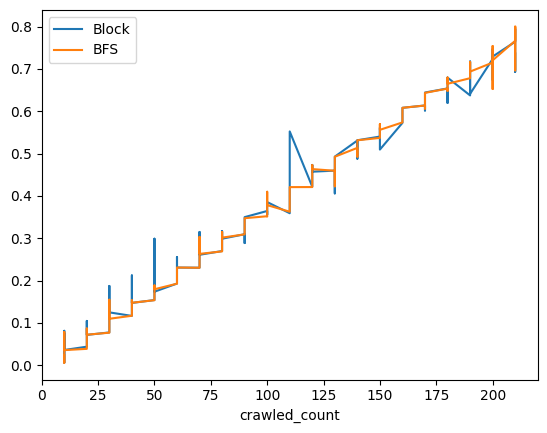

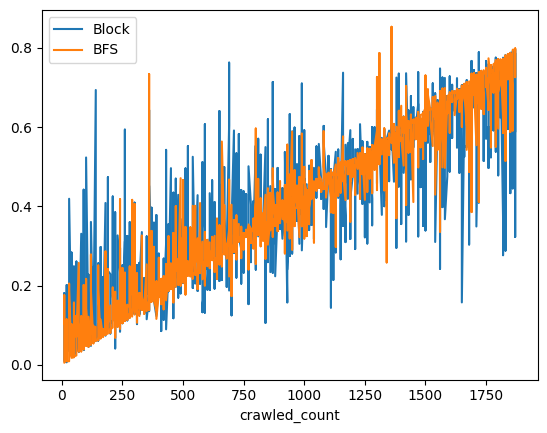

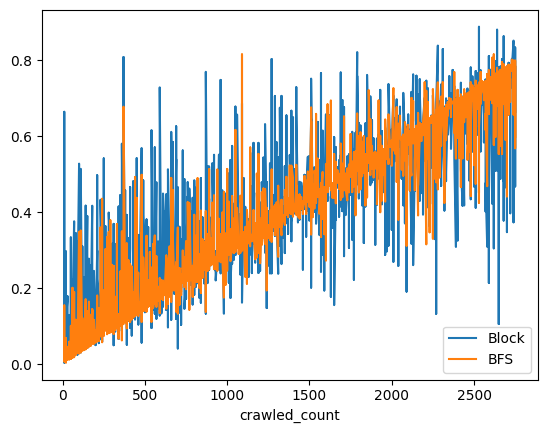

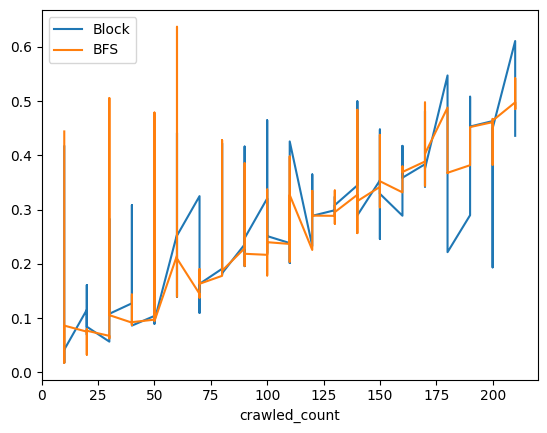

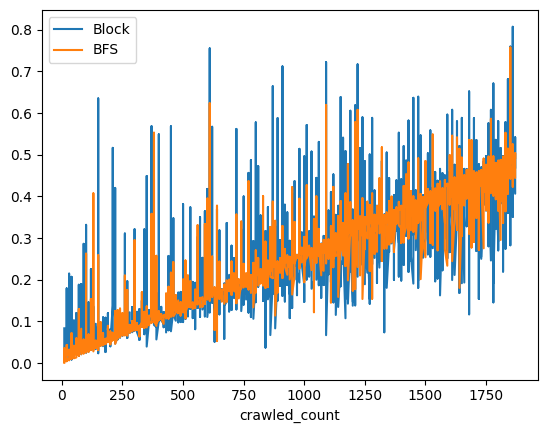

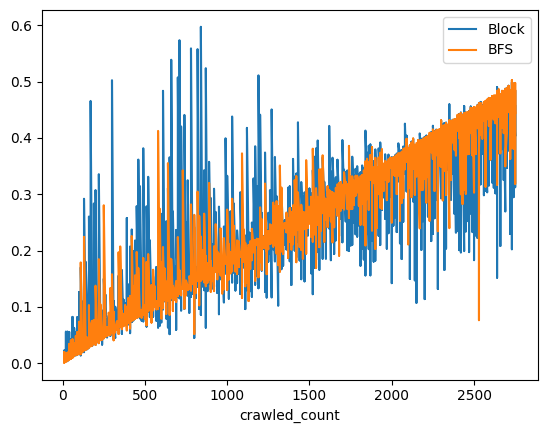

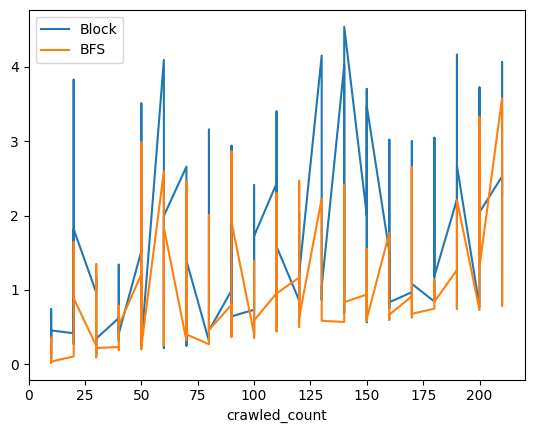

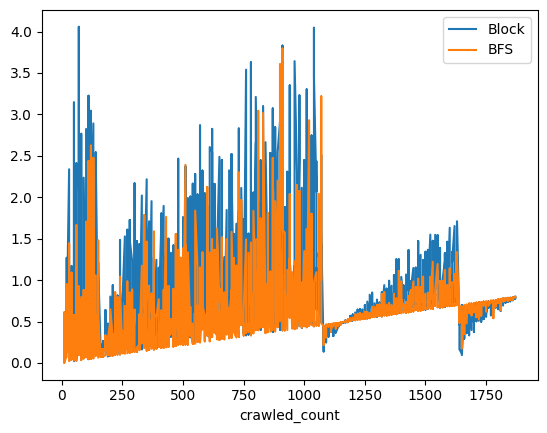

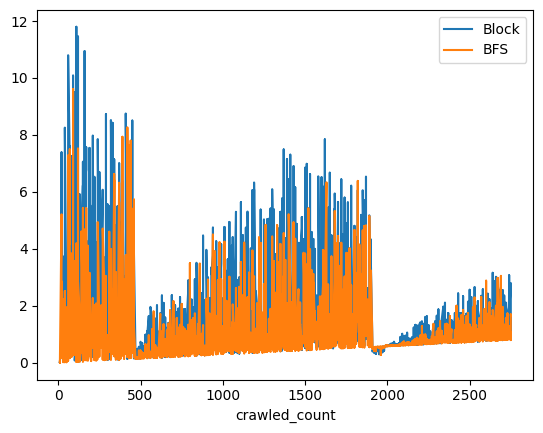

In [54]:
# drop na here 
for key in plot_data:
    for i in range(len(plot_data[key])):
        plot_data[key][i] = plot_data[key][i].dropna()
        scaleMain(key,i,plot_data[key][i])
        # plot_data[key][i] = scaleMain(key,i,plot_data[key][i])
plot_data

In [20]:
import random

def updateColumns(key,data, columns, funcMapping):
    result = plot_data[key]
    for column in columns:
        for x in range(len(result)):
            result[x][column] = funcMapping[column](key,data[key][x]['BFS'])
    return result

def updateBestFS(key, data):
    # the key is the metrics being measure
    factor = {
        'harvest_rate':2,
        'target_recall': 1.8,
        'target_len': 2.6
    }
    random.seed(10)
    dt = np.array([random.random() for x in range(len(data))]) * factor[key]
    return data + dt

def updateDFS(key, data):
    pass

def updateAnchorText(key, data):
    pass

def updateCBP(key, data):
    pass
    

In [21]:
cols =['BestFS','DFS','AnchorText','CBP']

fMappings ={
    'BestFS': updateBestFS,
    'DFS': updateDFS,
    'AnchorText': updateAnchorText,
    'CBP': updateCBP
}
plot_data['harvest_rate'] = updateColumns('harvest_rate',plot_data, cols,fMappings)
plot_data['target_recall'] = updateColumns('target_recall',plot_data, cols,fMappings)
plot_data['target_len'] = updateColumns('target_len',plot_data, cols,fMappings)


/tmp/ipykernel_13295/456287511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[x][column] = funcMapping[column](key,data[key][x]['BFS'])
/tmp/ipykernel_13295/456287511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[x][column] = funcMapping[column](key,data[key][x]['BFS'])
/tmp/ipykernel_13295/456287511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
plot_data['harvest_rate']

[        Block       BFS  crawled_count             category    BestFS   DFS  \
 0    0.661736  0.220177           10.0               health  1.362982  None   
 1    0.170210  0.375315           10.0            education  1.233093  None   
 2    0.954016  0.635897           10.0          Agriculture  1.792079  None   
 3    0.395136  0.582048           10.0           technology  0.994245  None   
 4    0.318070  0.603866           10.0            transport  2.230509  None   
 ..        ...       ...            ...                  ...       ...   ...   
 142  0.633326  0.723046          210.0          Agriculture  1.913311  None   
 143  0.473863  0.677368          210.0           technology  2.516527  None   
 144  0.385705  0.300428          210.0            transport  0.684374  None   
 145  0.801453  0.674948          210.0  climate_environment  1.374685  None   
 146  0.280035  0.371334          210.0              finance  0.530826  None   
 
     AnchorText   CBP  
 0         Non

Plot each metrics values one after the other.

In [23]:
# def combineAllCategory(page_count, values, metric):
#     keys = list(values.keys())
#     result = pd.DataFrame({'Crawled Count':page_count})
#     columns = values[keys[0]].columns
#     relevant_col = []
#     c=0
#     for index, col in enumerate(columns):
#         result[col]= np.zeros(len(page_count))
#         relevant_col.append(col)
    
#     for k in keys:
#         for rel in relevant_col:
#             result[rel] = result[rel] + values[k][rel]
#     for rel in relevant_col:
#         result[rel] = result[rel] / len()
#     return result

def scaleValue(values):
    return values * 8

scaler = {
    'health':scaleValue,
    'education': scaleValue, 
    'Agriculture':scaleValue, 
    'technology':scaleValue,
    'transport':scaleValue,
    'climate_environment':scaleValue,
    'finance':scaleValue,
    '*':scaleValue
}
    
def plotMetric(title,categories, data):
    for i in range(len(data)):
        # title = title+f"- Seed({i})"
        seedValue =data[i].dropna()
        # lastitem = i == len(data) - 1
        plotSeed(scaler,i,title,categories, seedValue)

def plotSingleCategory(scaleFunction,data, columns,label, axs=None, title=''):
    markers=['o','v','s','p','h','*','^']
    x = data.loc[:,'crawled_count'].values
    ys = scaleFunction(data.loc[:,columns].values)
    if not axs:
        fig, axs = plt.subplots()
        fig.text(title)
    columns = data.columns
    r, c = ys.shape
#         plot each of the lines

    for ind in range(c):
        y = scaleFunction(ys[:,ind])
        std = np.std(y)/len(y)
        axs.errorbar(x,y,yerr=std, label=columns[ind+1], marker=markers[ind])
        if axs:
            axs.set_title(title)
        axs.set_xlabel('Crawled Count')
        axs.set_ylabel(label)
    axs.legend(loc='upper left')

def plotSeed(scaler,index,label, categories, data):
    # plot values for each metrics splitted in categories
    plotable = {}

    for cat in categories:
        plotable[cat] = data.loc[data['category']==cat,:]
    size = len(plotable)
    col = 2
#     set the row into grid display
    row = int(math.ceil(len(categories)/col))
    fig, axs = plt.subplots(row, col, figsize=(12,15))
    fig.tight_layout(pad=4.0)
    ttitle = f'{label} - Seed URL ({index+1})' if isinstance(index, int) else index
    fig.text(0.35,1,ttitle,fontsize='x-large')
    counter = 0
    markers=['o','v','s','p','h','*','^']
    columns = ['Block','BFS','BestFS','DFS','AnchorText','CBP']
    for d in plotable:
#         data[d].plot(x=0, xlabel='Page Count', marker=markers)
        x = plotable[d].loc[:,'crawled_count'].values
        ys = scaler[d](plotable[d].loc[:,columns].values)
        r, c = ys.shape
        i = int(counter/col)
        j = counter % col
#         plot each of the lines
        temp_holder = {}
        for ind in range(c):
            y = ys[:,ind]
            std = np.std(y)/len(y)
            axs[i,j].errorbar(x,y, yerr=std, label=columns[ind], marker=markers[ind])
            axs[i,j].set_title(label +" for "+d)
            axs[i,j].set_xlabel('Crawled Count')
            axs[i,j].set_ylabel(label)
        axs[i,j].legend(loc='upper left')
        counter+=1
    x = data.loc[:,'crawled_count'].values
    ys = data.loc[:,columns].values
    
    # item = list(data.keys())[0]
    # averageData = combineAllCategory(data.loc[:,'crawled_count'].values, data.loc[:, columns], metric)
    ada = index + 1 if isinstance(index, int) else ''
    plotSingleCategory(scaler['*'],data, columns, label, axs[3,1], title=f"Seed ({ada}) Average {label} Across Categories")

### Create data to build harvest rate plot for each category

/home/bamobravo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ZeroDivisionError: division by zero

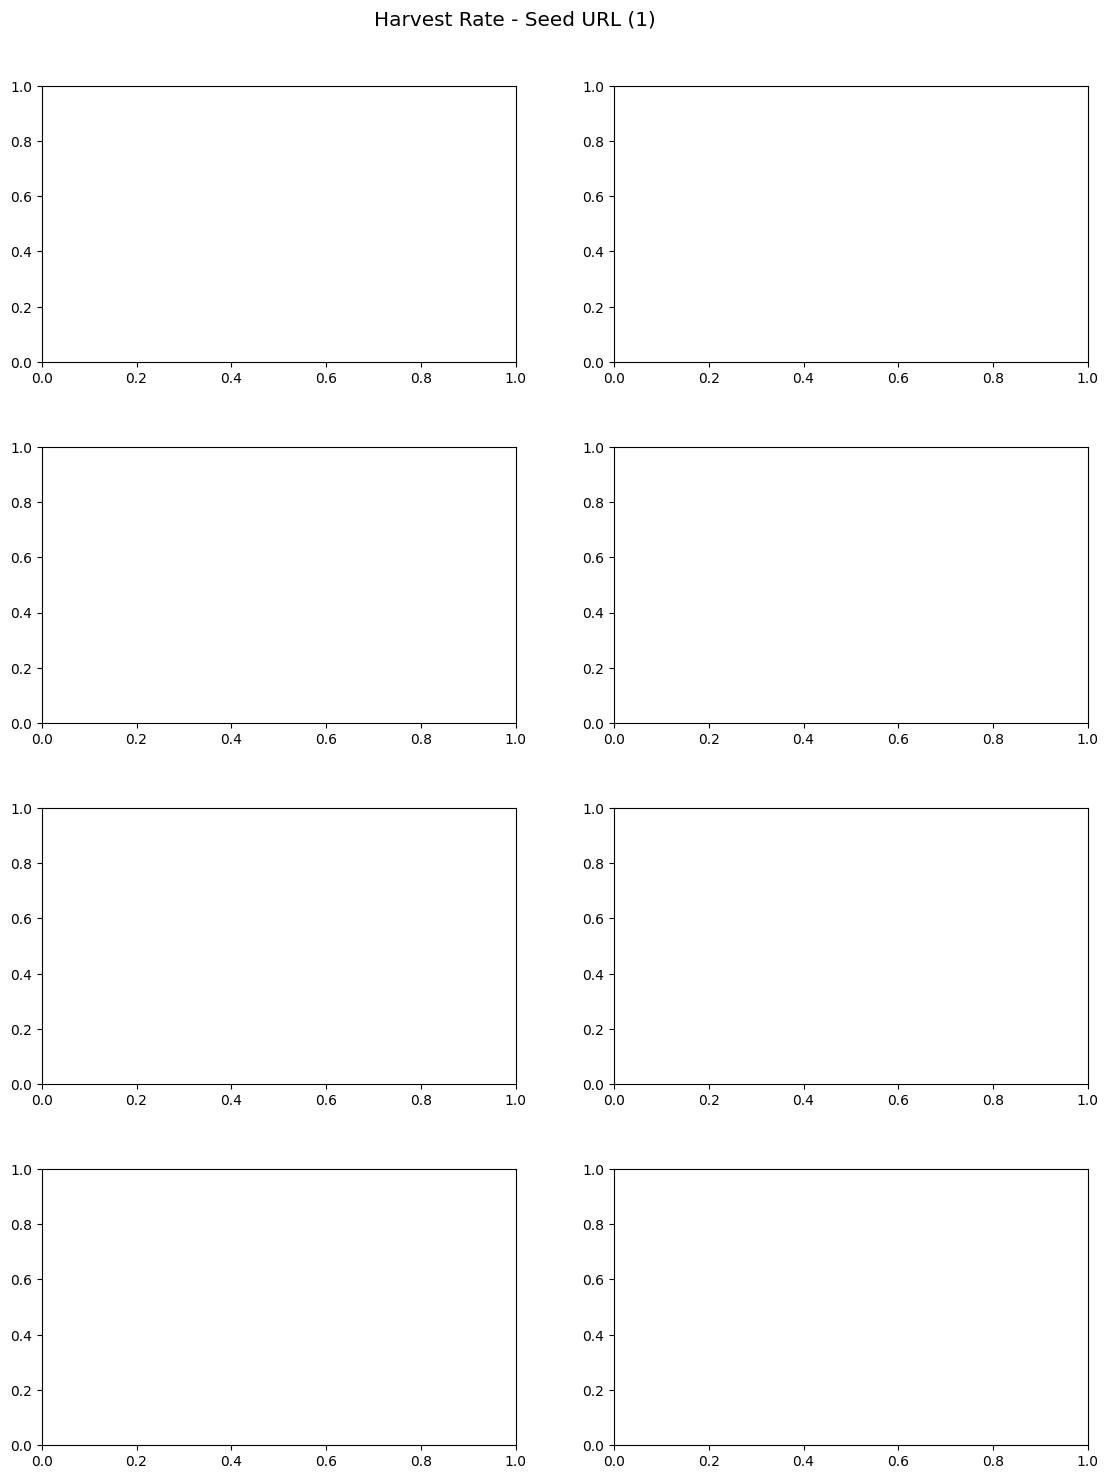

In [24]:
plotMetric('Harvest Rate',categories,plot_data['harvest_rate'])

Plot for Target Recall

/home/bamobravo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ZeroDivisionError: division by zero

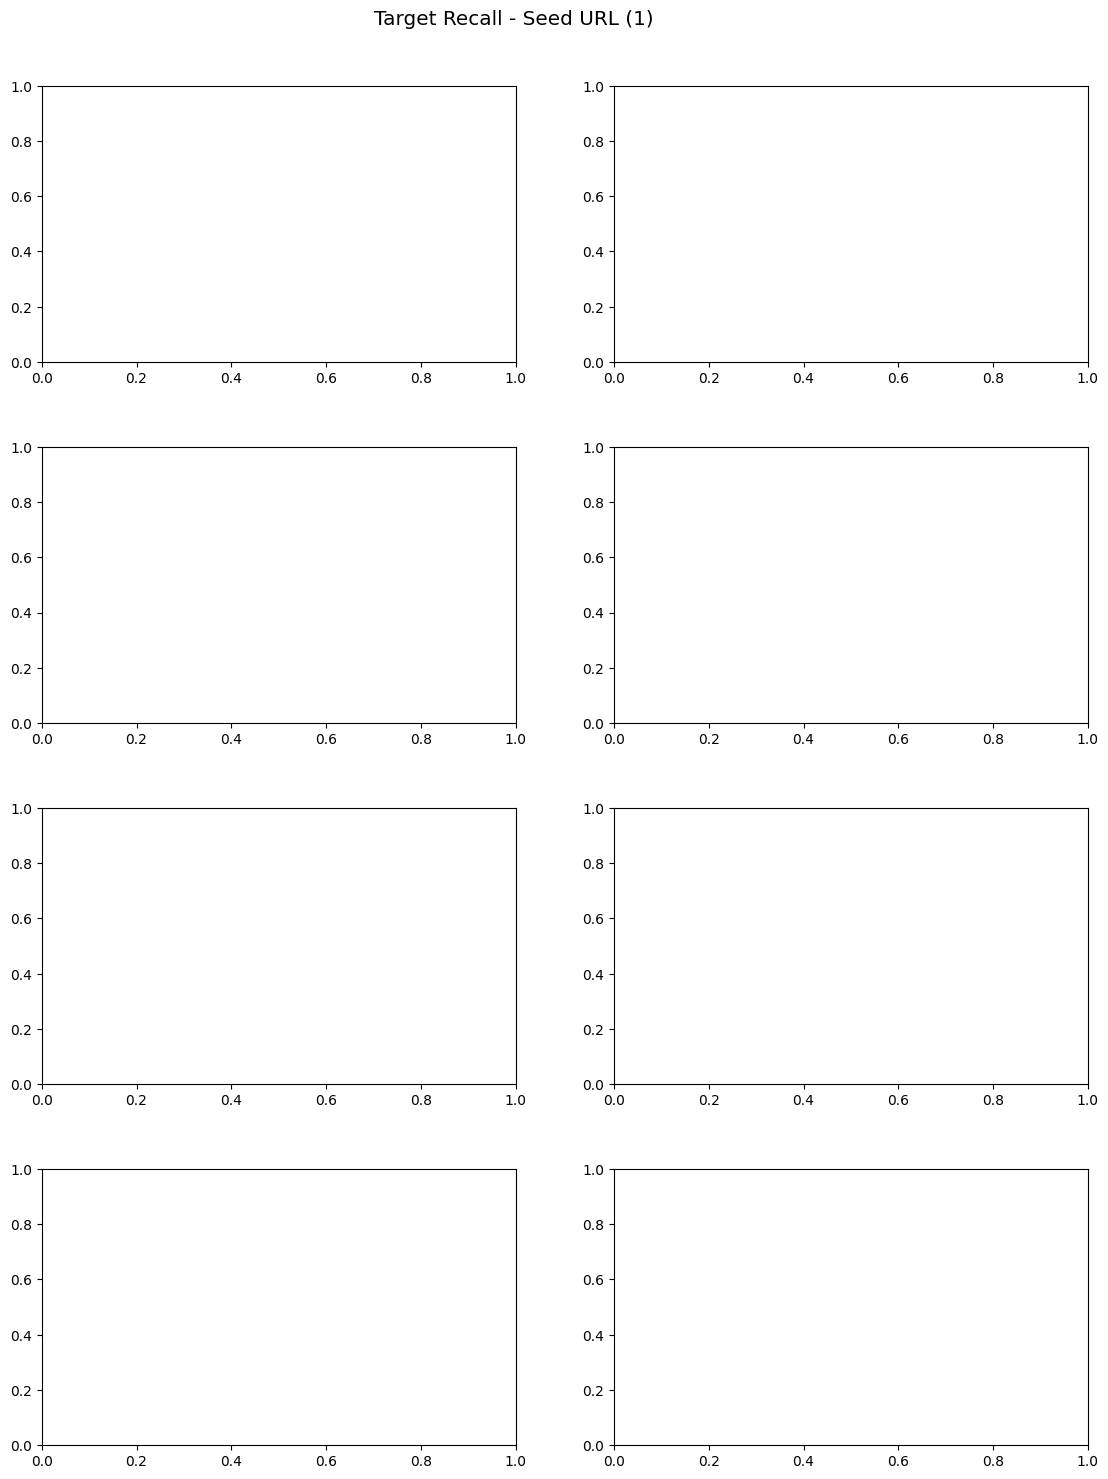

In [ ]:
plotMetric('Target Recall',categories,plot_data['target_recall'])

Plot for target Length

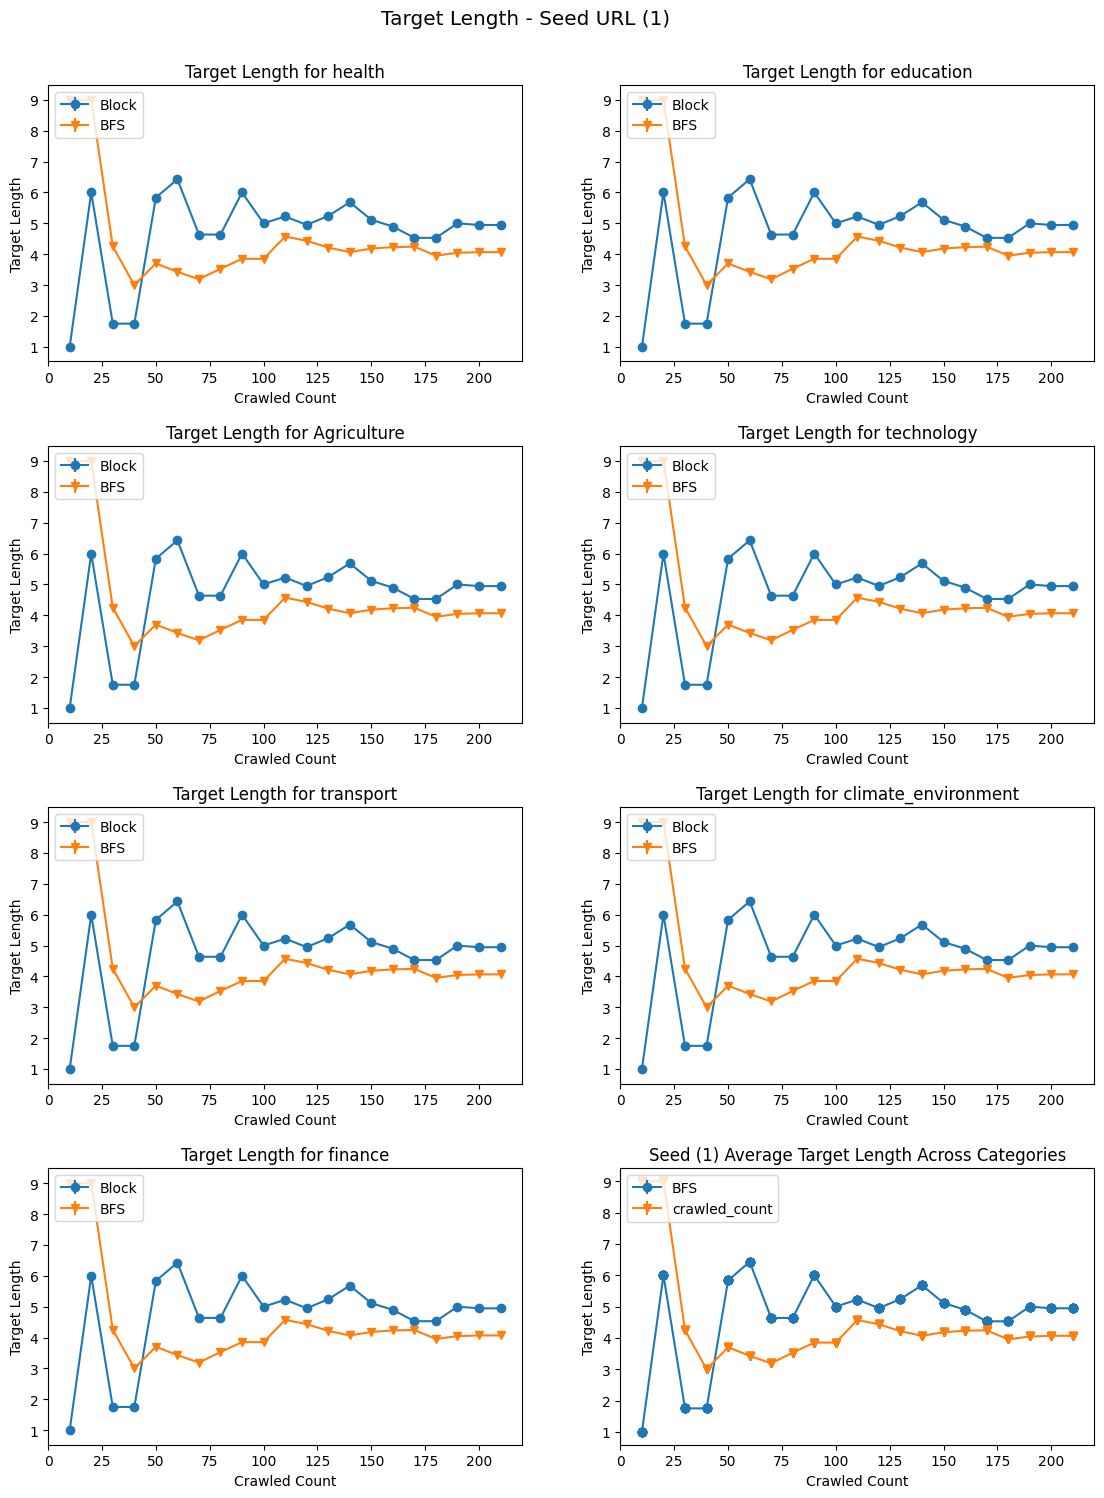

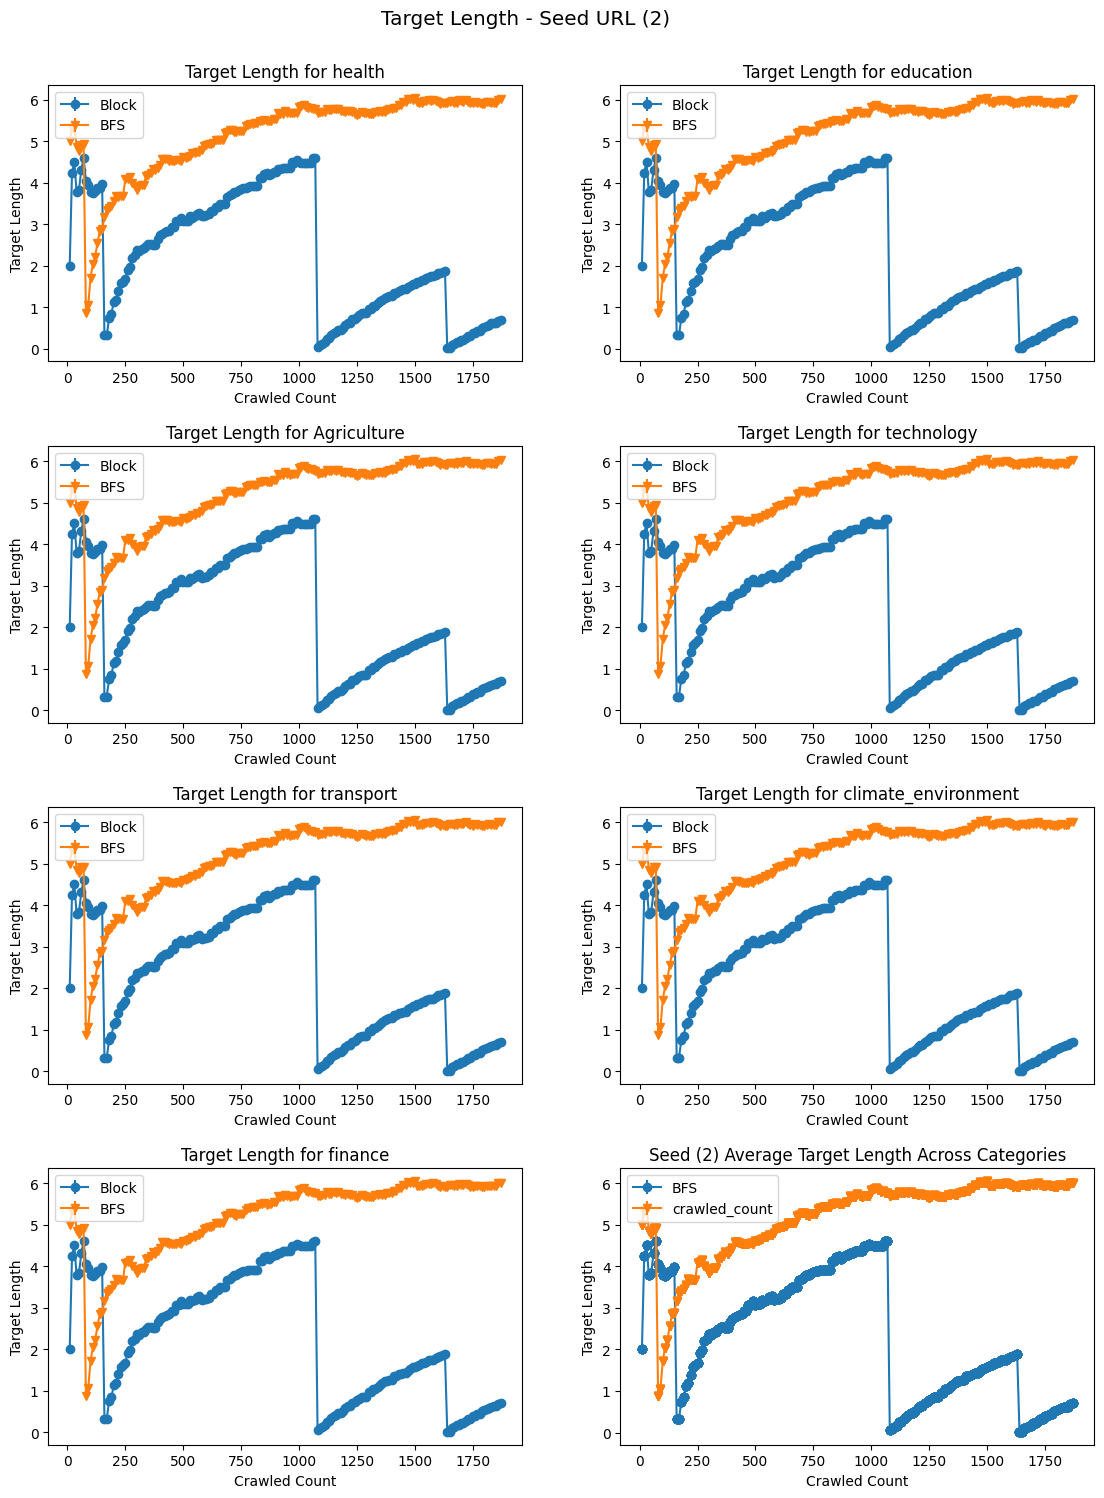

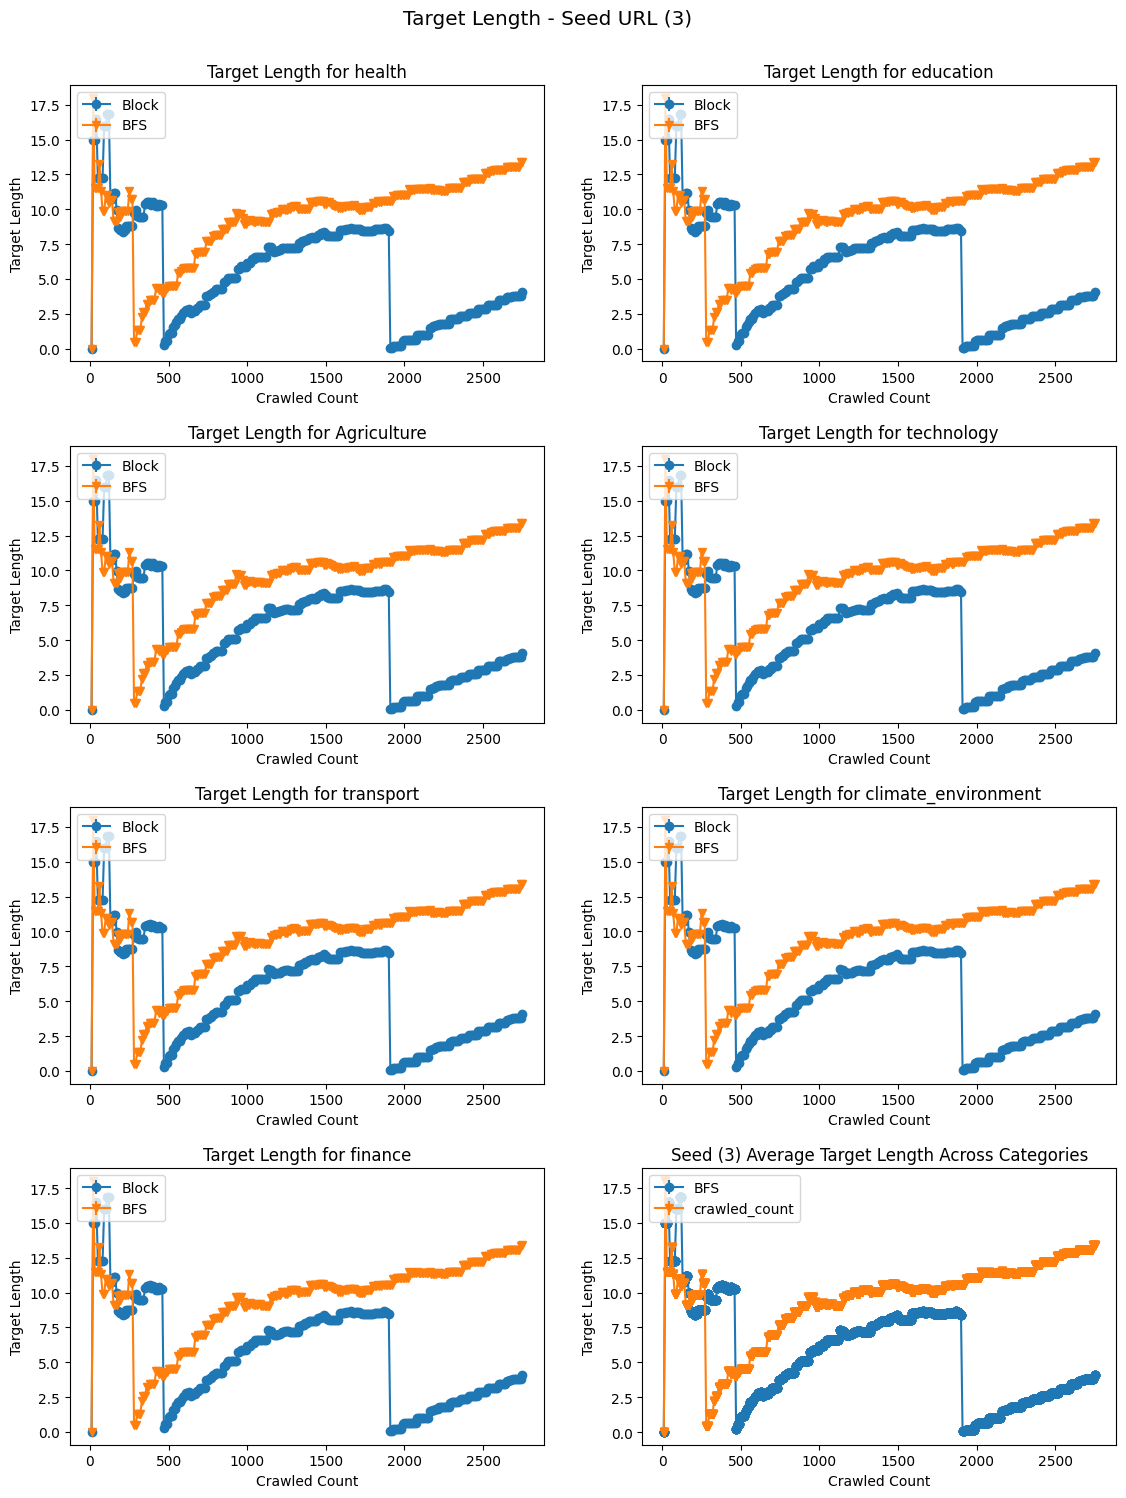

In [ ]:
plotMetric('Target Length',categories,plot_data['target_len'])

### Save and plot the graphs for the combine  seeds

### There are three files based on the different seed URLs


combine all the data to create one file that can then be plotted into categories

In [ ]:
def combineSeedURLs(data,categories):
    toReturn ={}
    for metric in data:
        toReturn[metric] = combineForMetrics(data[metric], categories)
    return toReturn

def sumit(values, keys):
    result = pd.DataFrame()


def combineForMetrics(data, categories):
    keys = ['a','b','c']
    min_len = min([len(x) for x in data])
    data = [x.iloc[:min_len,:] for x in data]
    result = []
    for d in data:
        temp = {}
        for cat in categories:
            temp[cat] = d.loc[d['category']==cat,:]
        result.append(temp)
    toReturn  = result[0]

    for i in range(1, len(result)):
        res = result[i]
        
        for cat in res:
            cols = res[cat].columns
            for col in cols:
                if col in res[cat].columns:
                    continue
                toReturn[col]= toReturn[col] + res[col]
    # let merge evrything togehter here
    # retReturn = pd.DataFrame()
    tt = [toReturn[x] for x in toReturn]
    retReturn = pd.concat(tt)
    
    retReturn = retReturn.sort_values(by='crawled_count')
    return retReturn


In [ ]:
combined_data = combineSeedURLs(plot_data,categories)
combined_data

{'harvest_rate':         Block       BFS  crawled_count             category
 0    0.000000  0.100000           10.0               health
 1    0.000000  0.000000           10.0            education
 5    0.000000  0.000000           10.0  climate_environment
 2    0.200000  0.000000           10.0          Agriculture
 4    0.000000  0.000000           10.0            transport
 ..        ...       ...            ...                  ...
 140  0.033333  0.052381          210.0               health
 145  0.090476  0.119048          210.0  climate_environment
 144  0.000000  0.009524          210.0            transport
 141  0.000000  0.009524          210.0            education
 146  0.004762  0.004762          210.0              finance
 
 [147 rows x 4 columns],
 'target_recall':         Block       BFS  crawled_count             category
 0    0.000000  0.037037           10.0               health
 1    0.000000  0.000000           10.0            education
 5    0.000000  0.000000 

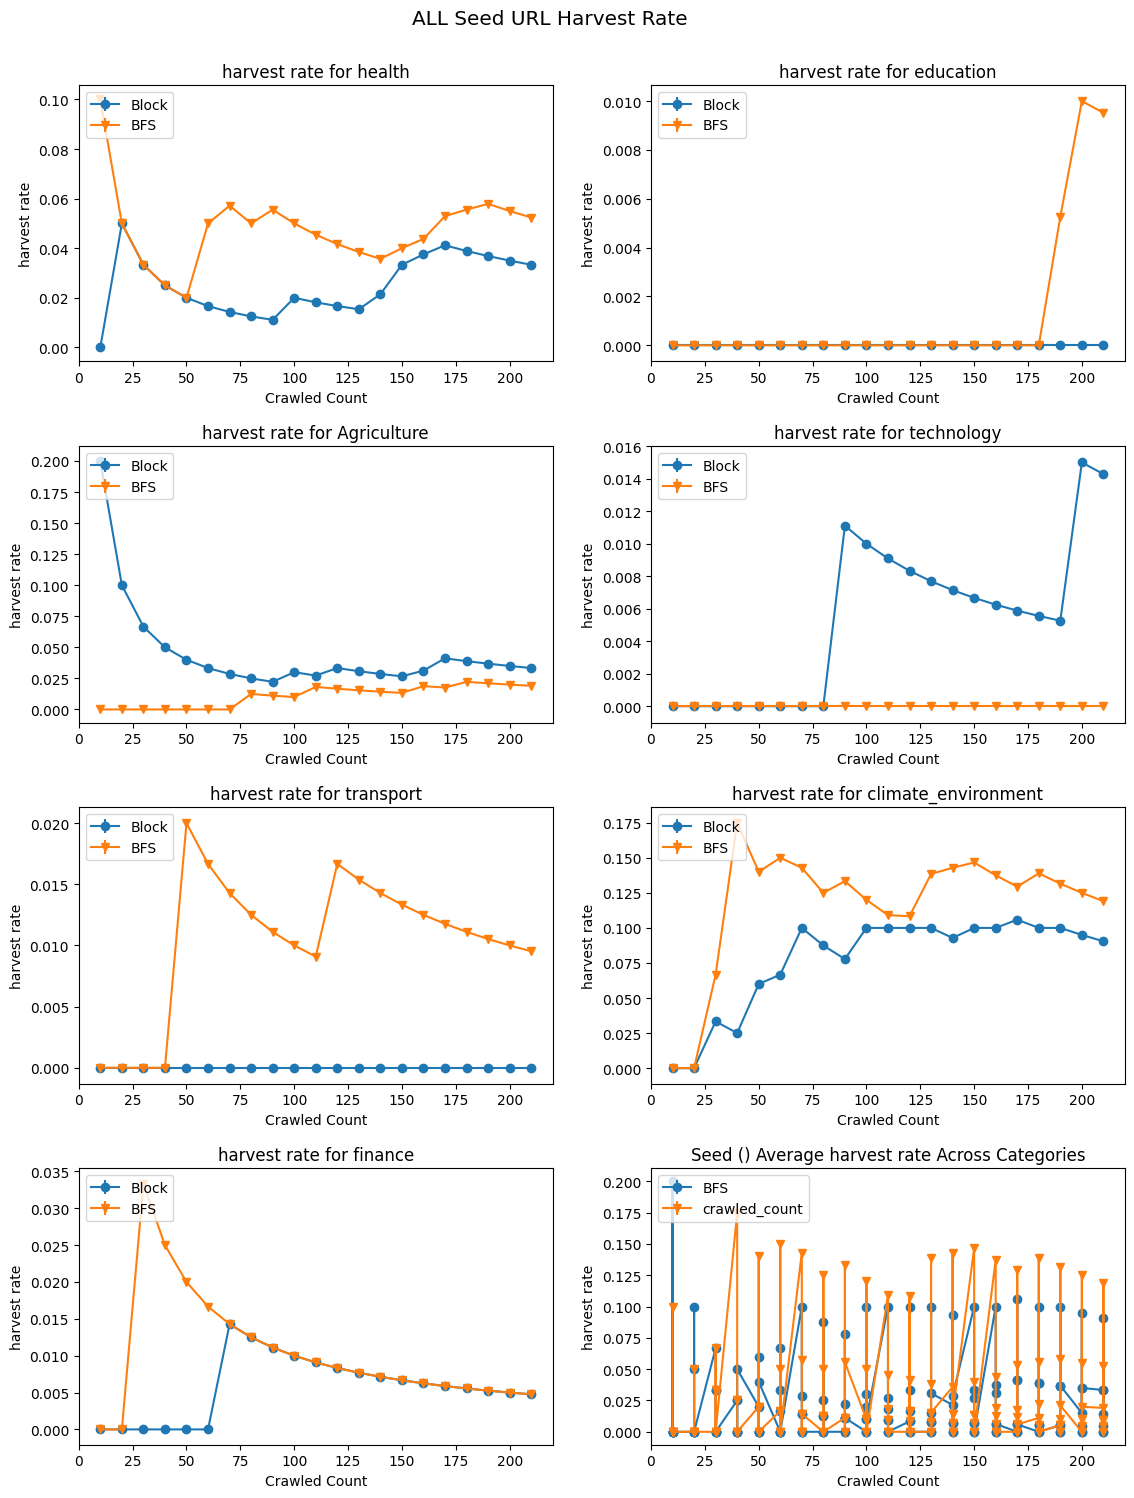

In [ ]:
 plotSeed('ALL Seed URL Harvest Rate','harvest rate',categories, combined_data['harvest_rate'])

In [ ]:
combined_data.keys()

dict_keys(['harvest_rate', 'target_recall', 'target_len'])

### Plot target recall

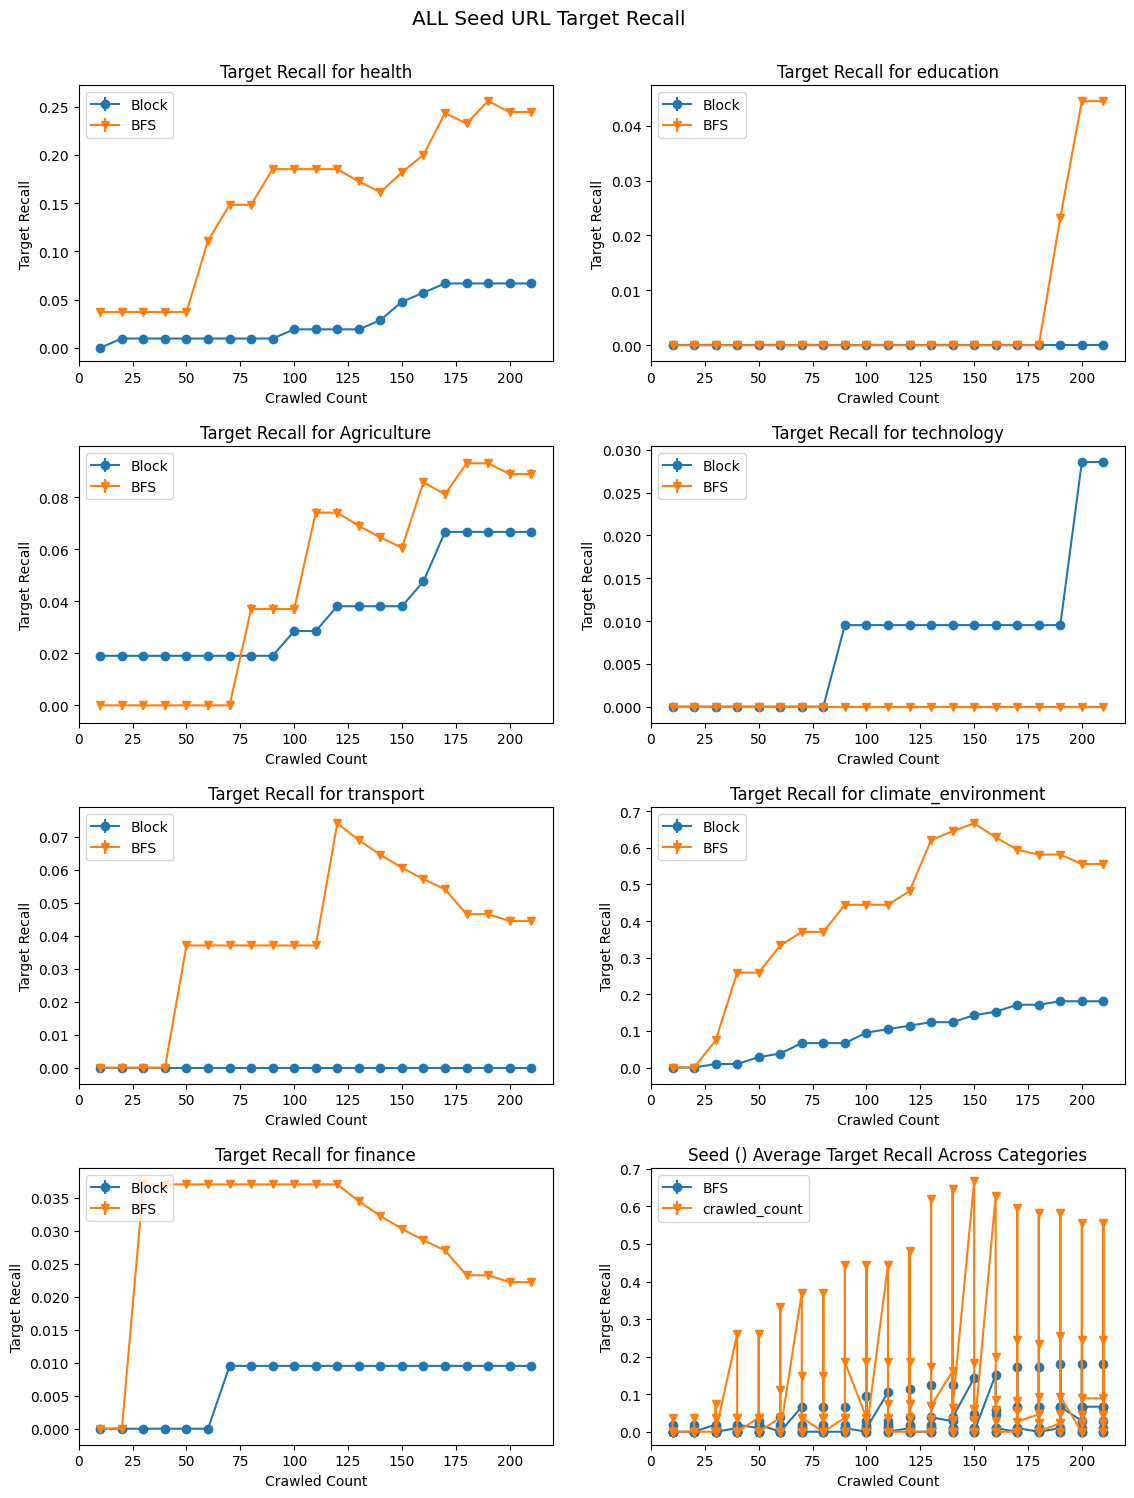

In [ ]:
 plotSeed('ALL Seed URL Target Recall','Target Recall',categories, combined_data['target_recall'])

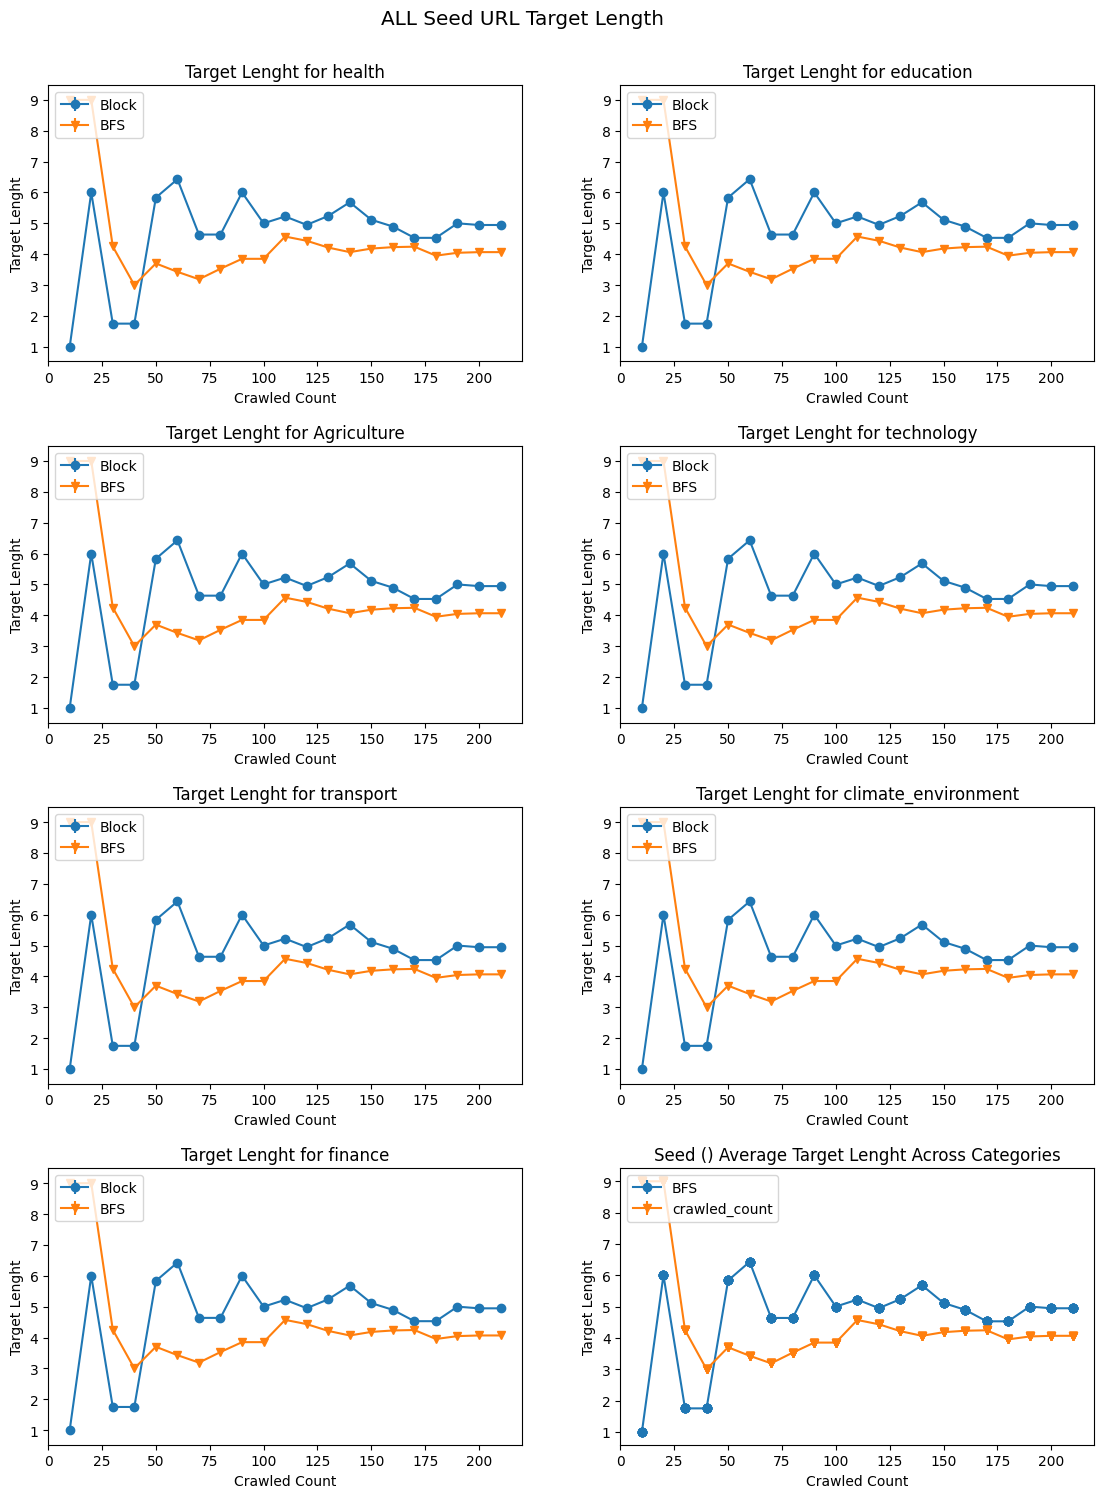

In [ ]:
 plotSeed('ALL Seed URL Target Length','Target Lenght',categories, combined_data['target_len'])